In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/petrol-consumption/petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.shape

(48, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
round(df.corr(),3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000,0.013,-0.522,-0.288,-0.451
Average_income,0.013,1.000,0.050,0.157,-0.245
Paved_Highways,-0.522,0.050,1.000,-0.064,0.019
Population_Driver_licence(%),-0.288,0.157,-0.064,1.000,0.699
Petrol_Consumption,-0.451,-0.245,0.019,0.699,1.000


<Axes: >

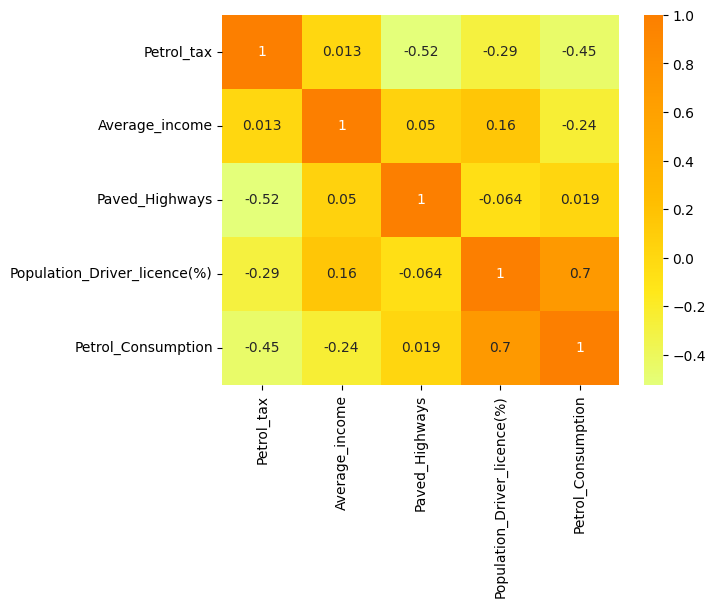

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)

<Axes: xlabel='Petrol_tax', ylabel='Petrol_Consumption'>

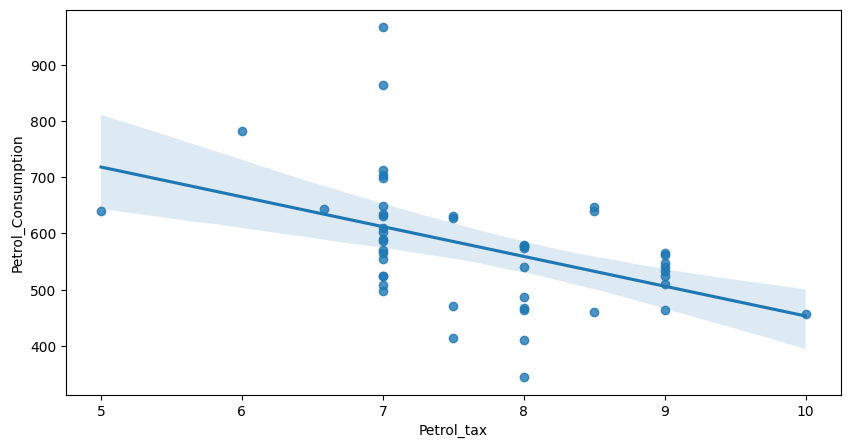

In [8]:
plt.rcParams['figure.figsize']=[10,5]
sns.regplot(data=df,x='Petrol_tax',y='Petrol_Consumption')

<Axes: xlabel='Average_income', ylabel='Petrol_Consumption'>

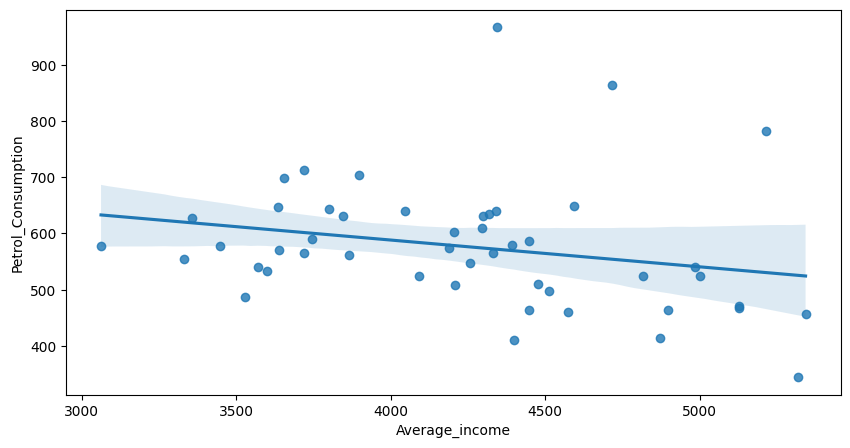

In [9]:
sns.regplot(x='Average_income',y='Petrol_Consumption',data=df)


<Axes: xlabel='Paved_Highways', ylabel='Petrol_Consumption'>

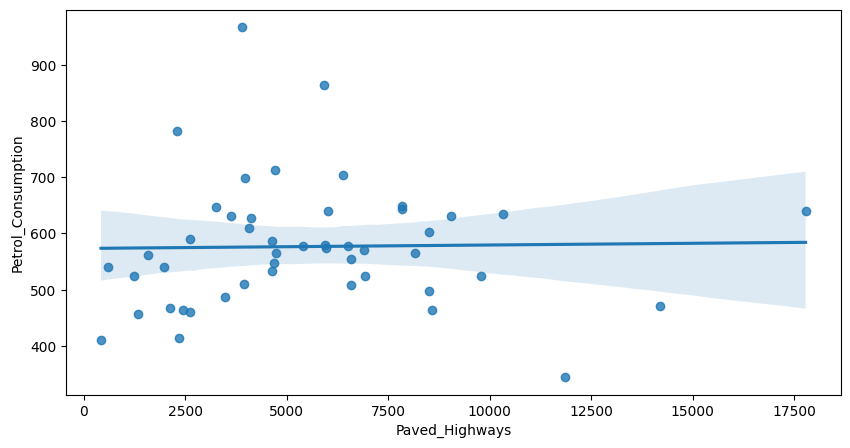

In [10]:
sns.regplot(data=df,x='Paved_Highways',y='Petrol_Consumption')

<Axes: xlabel='Population_Driver_licence(%)', ylabel='Petrol_Consumption'>

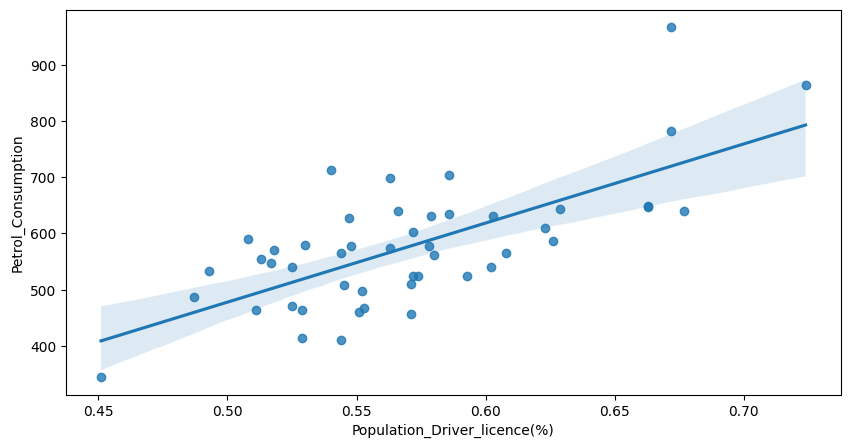

In [11]:
sns.regplot(data=df,x='Population_Driver_licence(%)',y='Petrol_Consumption')

<Axes: xlabel='Petrol_tax', ylabel='Count'>

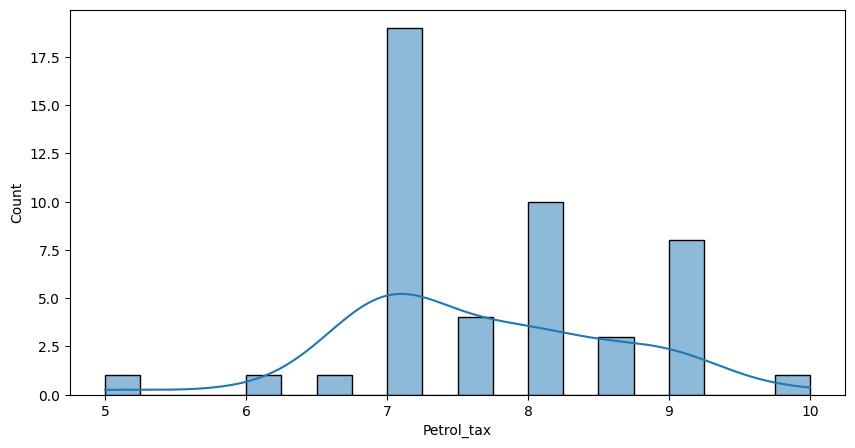

In [12]:
## To check the distributions 
sns.histplot(data=df,x='Petrol_tax',kde=True,bins=20,fill=True)

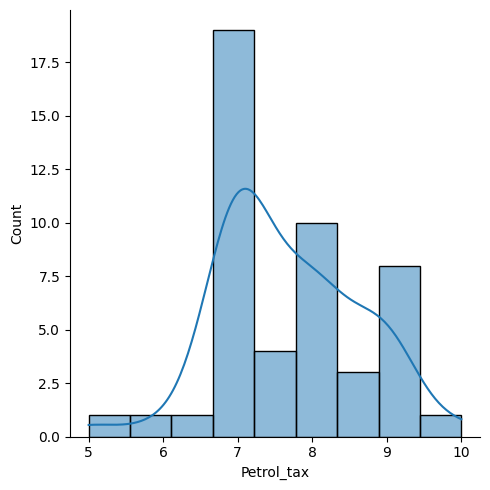

In [13]:
sns.displot(df['Petrol_tax'],kde=True)

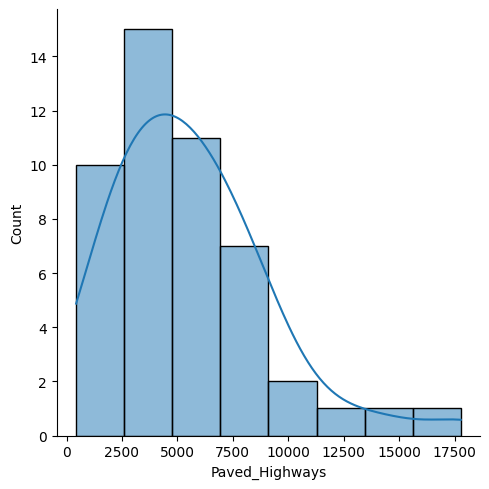

In [14]:
sns.displot(df['Paved_Highways'],kde=True)

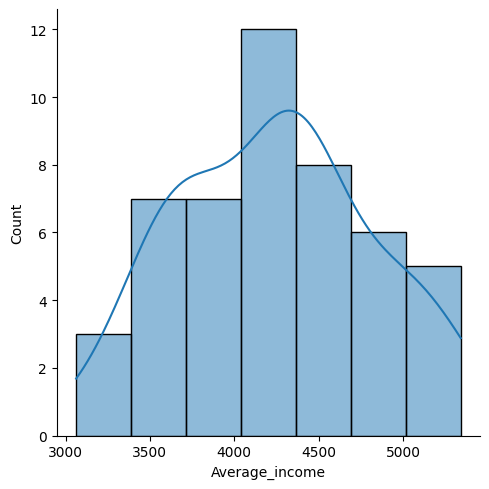

In [15]:
sns.displot(df['Average_income'],kde=True)

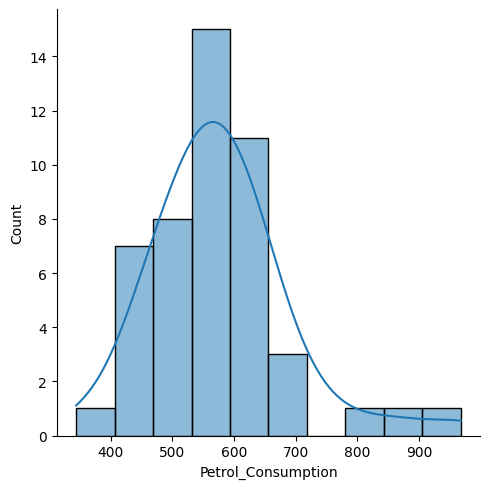

In [16]:
sns.displot(df['Petrol_Consumption'],kde=True)

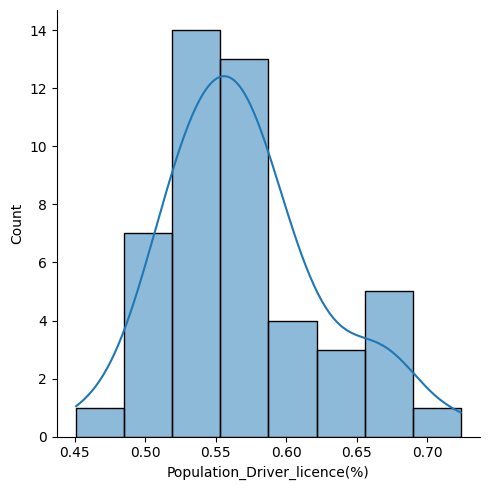

In [17]:
sns.displot(df['Population_Driver_licence(%)'],kde=True)

In [18]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [19]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


# separating Target and features

In [20]:
x = df.drop(['Petrol_Consumption'],axis=1)
y = df['Petrol_Consumption']

# Split Training and test dataset

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [22]:
x_train.shape,x_test.shape

((33, 4), (15, 4))

# Apply DecissionTree Algorithm for Regression 

In [23]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4,max_features=4)

reg_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, max_features=4)

In [24]:
y_pred = reg_tree.predict(x_test)
y_pred

array([648.   , 968.   , 648.   , 554.   , 648.   , 648.   , 544.   ,
       447.   , 558.375, 648.   , 554.   , 447.   , 558.375, 447.   ,
       447.   ])

In [25]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
14,566,648.000
18,865,968.000
17,714,648.000
30,571,554.000
13,508,648.000
42,632,648.000
20,649,544.000
8,464,447.000
34,487,558.375
46,610,648.000


we see that the predictions are not accurate. let's evaluate the prediction accuracy.

In [26]:
#evaluating the prediction accuracy

from sklearn import metrics
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean_squared_error :', metrics.mean_squared_error(y_test,y_pred))
print('r2 score :',metrics.r2_score(y_test,y_pred))

Mean absolute error : 59.983333333333334
Mean_squared_error : 5381.102083333333
r2 score : 0.5470137582525383


 looking after feature importances

In [27]:
reg_tree.feature_importances_
pd.Series(reg_tree.feature_importances_,index=x.columns).sort_values(ascending=False)

Population_Driver_licence(%)    0.521588
Average_income                  0.285473
Petrol_tax                      0.192938
Paved_Highways                  0.000000
dtype: float64

# Visualize decision_tree

[Text(0.65, 0.9, 'x[3] <= 0.667\nsquared_error = 12429.644\nsamples = 33\nvalue = 576.848'),
 Text(0.4, 0.7, 'x[1] <= 4358.5\nsquared_error = 6553.582\nsamples = 30\nvalue = 554.867'),
 Text(0.2, 0.5, 'x[0] <= 7.75\nsquared_error = 2659.608\nsamples = 18\nvalue = 602.944'),
 Text(0.1, 0.3, 'x[3] <= 0.53\nsquared_error = 1839.358\nsamples = 9\nvalue = 637.556'),
 Text(0.05, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 554.0'),
 Text(0.15, 0.1, 'squared_error = 1087.5\nsamples = 8\nvalue = 648.0'),
 Text(0.3, 0.3, 'x[3] <= 0.621\nsquared_error = 1084.0\nsamples = 9\nvalue = 568.333'),
 Text(0.25, 0.1, 'squared_error = 326.984\nsamples = 8\nvalue = 558.375'),
 Text(0.35, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 648.0'),
 Text(0.6, 0.5, 'x[3] <= 0.551\nsquared_error = 3726.521\nsamples = 12\nvalue = 482.75'),
 Text(0.5, 0.3, 'x[3] <= 0.488\nsquared_error = 2517.688\nsamples = 4\nvalue = 421.25'),
 Text(0.45, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 344.0'),
 Text(0.55, 0.1

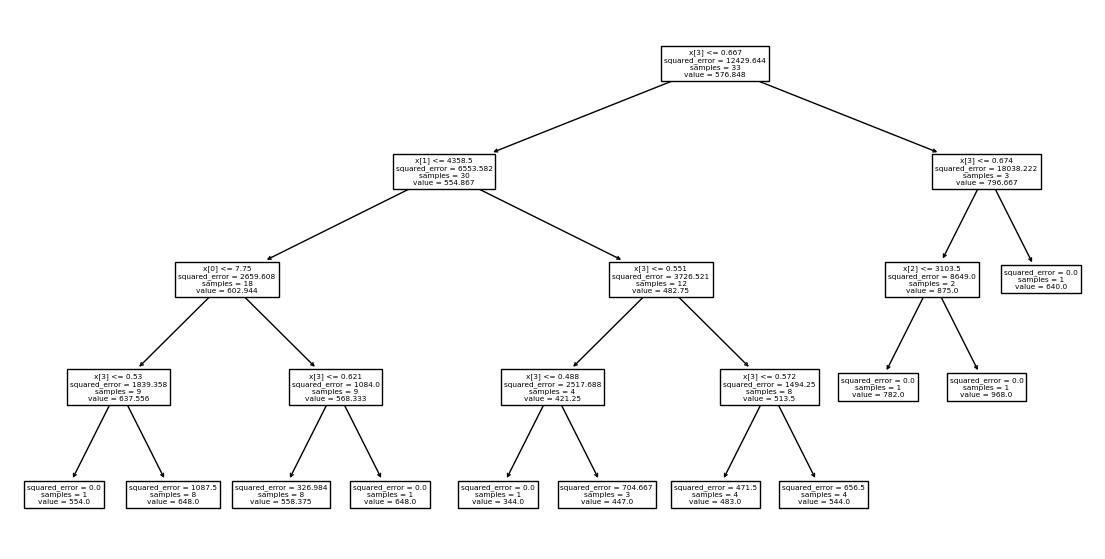

In [28]:
from sklearn import tree
plt.figure(figsize=[14,7])
tree.plot_tree(reg_tree.fit(x_train,y_train))

Importing Graphviz from sklearn library to plot decision tree

In [29]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(reg_tree,filled=True,rounded=True, feature_names=x.columns,out_file=None)

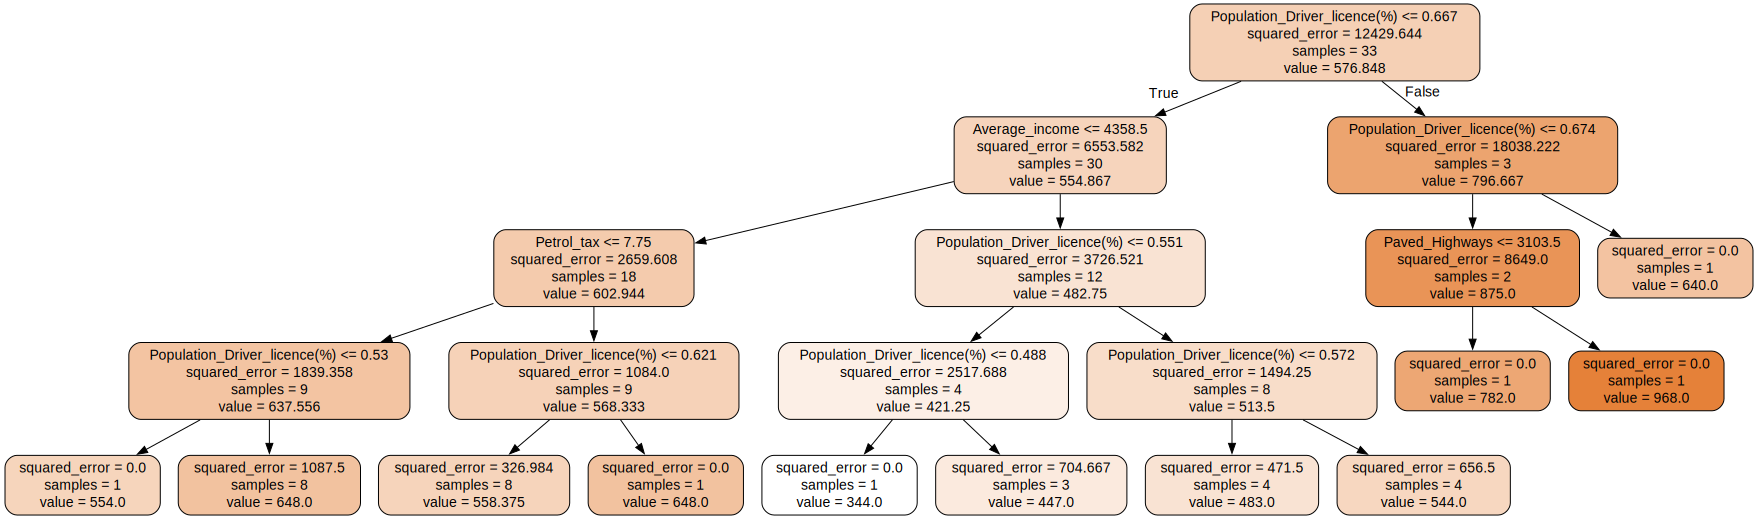

In [30]:
import graphviz
graphviz.Source(dot_data)

# Using Gridsearch & Cross Validation appropriately

Now i will grid search cv to find the optimal value of hyperparameters to plot the Decision Tree

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth':[3,4,5,None],'max_features':[3,4,5,6,7]}]
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),param_grid = param_grid,cv=10)

gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [32]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [33]:
gs.cv_results_['rank_test_score']

array([ 1, 17, 17, 17, 17,  2, 13, 13, 13, 13,  3,  9,  9,  9,  9,  4,  5,
        5,  5,  5], dtype=int32)

In [34]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=3, random_state=123)

In [35]:
tree = DecisionTreeRegressor(max_depth=3,max_features=4)

In [36]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features=4)

In [37]:
y_pred = tree.predict(x_test)

In [38]:
df=pd.DataFrame({'actual':y_test, 'predicted':y_pred})
df.head()

,actual,predicted
14,566,637.555556
18,865,640.000000
17,714,637.555556
30,571,637.555556
13,508,637.555556


In [39]:
from sklearn import metrics
print('Mean absolute error :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean_squared_error :', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 score :',metrics.r2_score(y_test,y_pred))

Mean absolute error : 76.76296296296296
Mean_squared_error : 9388.281069958848
Root Mean Squared Error: 96.89314253319915
r2 score : 0.20968565686174168


We use graphviz to plot the dot data as a decision tree.

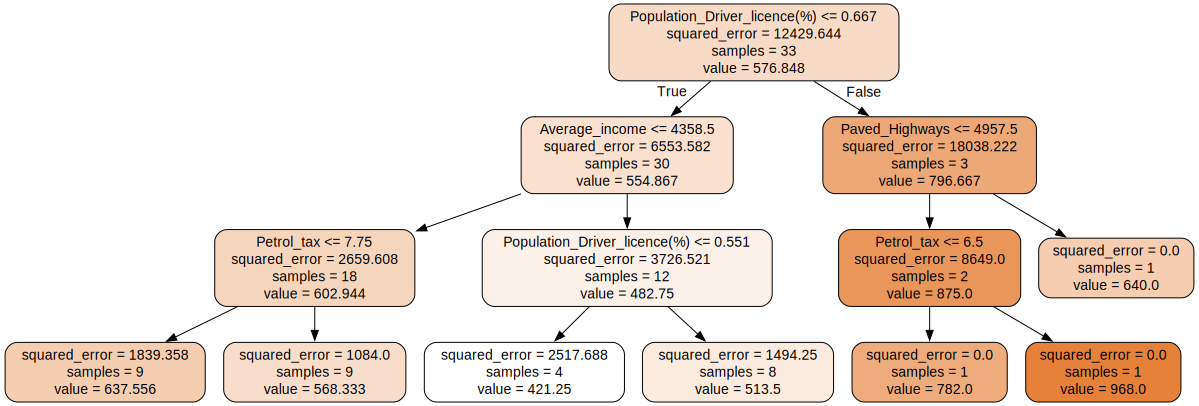

In [40]:
dot_data = export_graphviz(tree,filled=True,rounded=True,feature_names=x_train.columns,out_file=None)

import graphviz

graphviz.Source(dot_data)

# The Comparision Of Decision Tree without Applying GridSearch and One by applying with GridSearch

In [42]:
DT_Regressor=[['Max_Depth',4,3],['Max_Feature',4,4],['Mean Abs. Error',68.116,76.762],['Mean Square Error',8048.835,9388.281],['r2_Score',0.547,0.209]]
Result_Summary2= pd.DataFrame(DT_Regressor, columns = ['Parameters','Without Grid Search','With Grid Search'])
Result_Summary2

,Parameters,Without Grid Search,With Grid Search
0,Max_Depth,4.000,3.000
1,Max_Feature,4.000,4.000
2,Mean Abs. Error,68.116,76.762
3,Mean Square Error,8048.835,9388.281
4,r2_Score,0.547,0.209
